In [2]:
import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections

from collections import OrderedDict
import uproot
import pandas as pd
from root_numpy import array2tree


import scipy
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
import numpy as np
from scipy.stats import norm
import math
import CMS_lumi, tdrstyle
a= tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

wH = 1
Z_MASS = 91.2



# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# Load ntuples

In [3]:
fpath_bkg =OrderedDict()
tree_bkg = OrderedDict()
tree_sig = OrderedDict()
fpath_sig =OrderedDict()


start_t = time.time()
data_year = 'full'
pdgId = 13
category = 0
v1 = 'V1p17'
v2 = '/v5/v86'
v2 = '/v5/v93'
v2 = '/v5/v95'

v2 = '/v5/v98'

v2 = '/v5/v99'
v2 = '/v5/v112'

v2 = '/v5/v138'
v2 = '/v5/v146'
v2 = '/v5/v167'
v2 = '/v5/v182' # fixed timeweighted



# v2 = '/v5/v156'



# v2 = '/v5/v100'



#82
if data_year == 2016:
    data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+v1+'/Data'+str(data_year)+v2+'/normalized/'
elif data_year == 2017:
    data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+v1+'/Data'+str(data_year)+v2+'/normalized/'
elif data_year == 2018:
    data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+v1+'/Data'+str(data_year)+v2+'/normalized/'
elif data_year == 'full':
    data_path = '/storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+v1+'/Data2018/'+v2+'/normalized/'

else:
    print("DATA YEAR IS WRONG")
    raise NameError('DATA YEAR IS WRONG')
mc_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v1/v86/normalized/'
# mc_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p14/MC_RunIIFall18/v4/v4/normalized/'



if category == 0:
    if data_year == 2016:
        fpath_bkg['data'] = data_path + 'Run2_displacedJetMuonNtupler_'+v1+'_Data2016_Run2016-HighMET-07Aug17_goodLumi.root'
        fpath_bkg['mc'] = mc_path + 'ggH_HToSSTobbbb_ms55_pl1000_RunIIFall18_1pb_weighted.root'
        lumi = (5.632467289+2.572903489+1.685313225+3.988453305+3.068943620+3.527270568+8.609721915)*1000 #29.085073411
    elif data_year == 2017:
        fpath_bkg['data'] = data_path + 'Run2_displacedJetMuonNtupler_'+v1+'_Data2017_Run2017-HighMET-17Nov2017_goodLumi.root'
        fpath_bkg['mc'] = mc_path + 'ggH_HToSSTobbbb_ms55_pl1000_RunIIFall18_1pb_weighted.root'
        lumi = (4.738190514+4.145487893+ 9.295575564+2.603562425) * 1000 #20.782816396
 
    elif data_year == 2018:
        fpath_bkg['mc'] = mc_path + 'ggH_HToSSTobbbb_ms55_pl1000_RunIIFall18_1pb_weighted.root'

        fpath_bkg['data'] = data_path + 'Run2_displacedJetMuonNtupler_'+v1+'_Data2018_17Sept2018_Run2018-HighMET-17Sep2018_goodLumi.root'
        lumi = (13.954129666 + 6.941561868 + 3.227904890 + 31.312400879) * 1000 #55.435997303
#         fpath_bkg['data'] = data_path + 'Run2_displacedJetMuonNtupler_V1p12_Data2018_17Sept2018_Run2018AB-HighMET-17Sep2018_goodLumi.root'
#         lumi = (13.954129666 + 6.941561868 ) * 1000 #AB
#         fpath_bkg['data'] = data_path + 'Run2_displacedJetMuonNtupler_V1p12_Data2018_17Sept2018_Run2018CD-HighMET-17Sep2018_goodLumi.root'
#         lumi = (3.227904890 + 31.312400879) * 1000 #CD
    else: #2016, 2017, 2018AB
#         fpath_bkg['mc'] = mc_path + 'ggH_HToSSTobbbb_MH-125_MS-40_ctau-1000_TuneCP5_13TeV-powheg-pythia8_59740pb_weighted.root'
        fpath_bkg['data'] = data_path + 'Run2_displacedJetMuonNtupler_'+v1+'_Data2016_Data2017_Data2018-HighMET_goodLumi.root'

        lumi = 137000

NEvents = {}
print(data_year, lumi/1000)
NEvents_genweight = {}
for k,v in fpath_bkg.items():
    print (k, v)
#     tree[k] = rtnp.root2array(v)
    root_dir = uproot.open(v) 
#     if k[:7] == 'ntuples':
#         tree_bkg[k] = root_dir['ntuples']['llp']
#         NEvents[k] = root_dir['ntuples']['NEvents'][1]
#     else:
    tree_bkg[k] = root_dir['MuonSystem']
    NEvents[k] = root_dir['NEvents'][1]
#     tree[k] = root_dir['ntuples']
    a = tree_bkg[k]["weight"].array()
    print("NEvents",NEvents[k])
    # 22743688.0

    print ('weights',np.unique(a)*lumi)
    print(np.sum(a))
    print(len(a))
#     print(len(a)/ NEvents[k])
#     print(a.shape)
print(time.time()-start_t)

full 137.0
data /storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/Data2018//v5/v182/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Data2017_Data2018-HighMET_goodLumi.root
NEvents 22763250.0
weights [137000.]
1021755.0
1021755
0.3694579601287842


# nCsc with different hit vetoing

In [11]:

JET_PT_CUT = 10.0
MUON_PT_CUT = 20.0
N_RECHIT_CUT = 90
jetPt_cut = 50
tightid = False
ring_cut = 50

cut_based = True
cut_based_version = 'v4'

intime = True
DPHI_CUT = 1
weight = {}
weight_event = {}
weight_ctau = {}
lumiSec = {}
evtNum = {}
nCsc = {}
npv = {}
npu = {}
runNum = {}
nCsc_JetMuonVetoCluster0p4_Me1112Veto = {}
cscRechitClusterJetVetoPt = {}
cscRechitCluster_match_dr = {}
cscRechitCluster2_match_highEta_0p4 = {}
gLLP_csc = {}
cscClusterSize = {}
cscClusterTime = {}
nCscClusters = {}
selections_cluster = {}
sel_cluster = {}
sel_jetveto = {}
met_trigger = {}
met = {}
gLLP_beta = {}
jetPt = {}
jetPhi = {}
metPhi = {}
angle ={}
nLeptons = {}
genJetPt = {}
genJetPhi = {}
genMet = {}
genMetPhi = {}
pileupWeight = {}
gLLP_ctau = {}
npv = {}
nRechitClusters = {}
nJets = {}
nJets_50gev = {}
nCscRings = {}
nDtRings = {}
cscRechitClusterTimeDiff = {}
cscRechitCluster_match_gLLP = {}


cscRechitClusterJetVetoE = {}
cscRechitClusterXSpread = {}
cscRechitClusterYSpread = {}
cscRechitClusterNStation = {}
cscRechitClusterEtaPhiSpread = {}
cscRechitClusterPhiSpread = {}
cscRechitClusterEtaSpread = {}
cscRechitClusterX = {}
cscRechitClusterY = {}
cscRechitClusterZ = {}
cscRechitClusterPhi = {}
cscClusterJetVetoPt = {}
cscRechitClusterEta = {}
cscRechitClusterXYSpread = {}
cscRechitClusterZSpread = {}
cscRechitClusterMaxStationRatio = {}
cscRechitClusterNStation = {}
cscRechitClusterNChamber = {}
cscRechitClusterMet_dPhi = {}
cscRechitCluster_match= {}
cscRechitClusterMuonVetoE = {}
cscRechitClusterMuonVetoPt = {}
jetMet_dPhiMin30 = {}
cscRechitClusterNStation10 = {}
cscRechitClusterAvgStation10 = {}
cscRechitClusterMaxChamberRatio = {}
cscRechitCluster2_match_Me1112_0p4 = {}
cscClusterTimeSpreadTotalPruned = {}
cscRechitCluster2_match_Me1112_0p8 = {}
cscRechitCluster2_match_MB1Seg_0p4 = {}
cscRechitCluster2_match_ME11Seg_0p4 = {}
cscRechitCluster2_match_ME12Seg_0p4 = {}
cscRechitClusterMuonVetoLoose = {}
cscRechitClusterMuonVetoTight = {}
nCscRechitClusters2 = {}
jetMet_dPhiMin = {}
dphiMet_cluster = {}
nRechits_sr = {}
jetMet_dPhiMin30_sr = {}
cscClusterTimeSpread = {}
bdt_score = {}
nCscChambers = {}
a = {}
b = {}
c = {}
d = {}
sel_ev = {}
bdt_sel = {}
ctau ={}
cscRechitClusterMaxChamber = {}
legend = {}
cscRechitClusterMaxChamberRatio = {}
cscRechitClusterMaxStationRatio = {}
dphiMetXYCorr_cluster = {}
metPhiXYCorr = {}
nCscRechits = {}
cscRechitClusterAvgStation = {}
cscRechitCluster2_match_MB1_0p4 = {}
cscRechitCluster2_match_RE12_0p4 = {}
cscRechitCluster2_match_RB1_0p4 = {}
nDTRechitsStation4  = {}
beamHaloFilter = {}
cscClusterTimeTotal = {}
cscClusterMetXYCorr_dPhi = {}
legend['data_oot'] = 'Data OOT region'
legend['data_intime'] = 'Data in-time region'
legend['mc_signal'] = 'signal MC in time'
legend['mc_intime'] = 'MC in-time background'
legend['mc_oot'] = 'MC OOT background'
legend['mc_bkg'] = 'QCD 50toInf background'


cluster_index = ''
keys = ['data_intime_BDTbin0', 'data_intime_BDTbin1', 'data_oot_BDTbin0', 'data_oot_BDTbin1']
# keys = ['data_intime_beamhalo', 'data_intime_punchthrough']
print(keys)



for k in keys:
#     if not k=='data_intime_BDTbin1': continue
    if 'data' in k: T = tree_bkg['data']
    else: T = tree_bkg[k]

        
########### SELECTION: CLUSTERS ############
#     sel_rechitcluster = np.logical_or(T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt') < MUON_PT_CUT,\
#                               T.array('cscRechitCluster' + cluster_index + 'MuonVetoLooseId') == 0)



    sel_rechitcluster = np.abs(T.array('cscRechitCluster' + cluster_index + 'Eta')) < 2.0

    me1112_veto = 0
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'NRechitChamberPlus11') <= me1112_veto)
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'NRechitChamberPlus12') <= me1112_veto)
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'NRechitChamberMinus11') <= me1112_veto)
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'NRechitChamberMinus12') <= me1112_veto)

    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + '_match_MB1Seg_0p4') <= me1112_veto)
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + '_match_RE12_0p4') <= me1112_veto)
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + '_match_RB1_0p4') <= me1112_veto)

    sel_rechitcluster = np.logical_and( sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'JetVetoPt') < JET_PT_CUT)


    sel_rechitcluster = np.logical_and( sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt') < MUON_PT_CUT)

    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'TimeSpreadWeightedAll') <= 20)


    if 'oot' in k:
        sel_rechitcluster = np.logical_and(sel_rechitcluster,  T.array('cscRechitCluster' + cluster_index + 'TimeWeighted') < -12.5)


    else:
        if "punchthrough" in k:
            sel_rechitcluster = np.logical_and( sel_rechitcluster, T.array('cscRechitCluster' + cluster_index + 'JetVetoPt') >= JET_PT_CUT)
        else:
            sel_rechitcluster = np.logical_and(sel_rechitcluster, np.logical_and(T.array('cscRechitCluster' + cluster_index + 'TimeWeighted') < 12.5, \
                                                                             T.array('cscRechitCluster' + cluster_index + 'TimeWeighted') > -5.0))
            
            
        
########### SELECTION: JETS ############
    
    sel_jet = np.logical_and(T.array('jetPt') > 30, np.abs(T.array('jetEta')) < 2.4 )
    sel_jet = np.logical_and(sel_jet, T.array('jetTightPassId'))

########### SELECTION: EVENTS ############
    hlt = T['HLTDecision'].array()
    # select only triggered events
    sel_ev[k] = T.array('METNoMuTrigger')


    sel_ev[k]  = np.logical_and(sel_ev[k],sel_rechitcluster.sum() == 1)
    sel_ev[k] = np.logical_and(sel_ev[k], (T.array('nDtRings')+T.array('nCscRings'))<10)
    sel_ev[k] = np.logical_and(sel_ev[k] ,T.array('metEENoise') > 200)


#     sel_ev[k]  = np.logical_and(sel_ev[k], T.array('category') == category)
#     sel_ev[k] = np.logical_and(sel_ev[k] ,T.array('nLeptons') == 0)
    sel_ev[k] = np.logical_and(sel_ev[k] , sel_jet.sum()>=1)
    if 'beamhalo' in k:
        sel_ev[k] = np.logical_and(sel_ev[k],np.logical_not(T.array('Flag2_all')))
    else:
        sel_ev[k] = np.logical_and(sel_ev[k],T.array('Flag2_all'))

    gLLP_csc[k] = T.array('gLLP_csc')
    if k[:2] == 'mc':
        sel_ev[k] = np.logical_and(sel_ev[k], np.sum(T.array('gLLP_csc'),axis = 1) > 0)
########### BRANCHES ############

   ##### event variables ##### 
    
    gLLP_beta[k] = T.array('gLLP_beta')[sel_ev[k]]

    ##### bdt variables ####
    cscRechitClusterPhi[k] = T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
    cscRechitClusterNStation10[k] = T.array('cscRechitCluster' + cluster_index + 'NStation10')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
    cscRechitClusterEta[k] = T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
    cscRechitClusterPhi[k] = T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
    cscRechitClusterAvgStation10[k] = T.array('cscRechitCluster' + cluster_index + 'AvgStation10')[sel_rechitcluster][sel_ev[k]][:,0].flatten()


    if 'beamhalo' in k or 'punchthrough' in k or 'mc' in k:
        bdt_bin = 1
    else:
        bdt_bin = int(k[-1])
    
    
    #cut based
    if cut_based:
        print("cut based", cut_based_version)
        if cut_based_version == 'v4':
            cond2 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==2, np.abs(cscRechitClusterEta[k]) < 1.6)
            cond3 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==3, np.abs(cscRechitClusterEta[k]) < 1.6)
            cond4 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==4, np.abs(cscRechitClusterEta[k]) < 1.8)
            cond1 = np.logical_and(cscRechitClusterNStation10[k]==1, np.logical_or(np.logical_or(np.abs(cscRechitClusterAvgStation10[k])==1, cond2), np.logical_or(cond3, cond4)))
            cond2 = np.logical_and(cscRechitClusterNStation10[k] > 1, np.abs(cscRechitClusterEta[k]) < 1.9)
            bdt_sel[k] = np.logical_or(np.logical_or(cond1, cond2), np.logical_or(cond3, cond4))
        else:
            print("CUT BASED ERROR")
        if bdt_bin == 0:
            bdt_sel[k] = np.logical_not(bdt_sel[k])    
    else:
        print("ERROR")
    print("effiency",np.count_nonzero(bdt_sel[k])/len(bdt_sel[k]))
#     dphiMet_cluster[k] = T.array('cscRechitCluster' + cluster_index + 'MetXYCorr_dPhi')[sel_rechitcluster][sel_ev[k]][:,0].flatten()[bdt_sel[k]]
    dphiMet_cluster[k] = T.array('cscRechitCluster' + cluster_index + 'MetEENoise_dPhi')[sel_rechitcluster][sel_ev[k]][:,0].flatten()[bdt_sel[k]]




    jetMet_dPhiMin30[k] = T.array('jetMet_dPhiMin')[sel_ev[k]][bdt_sel[k]]
    beamHaloFilter[k] = T.array('Flag2_globalSuperTightHalo2016Filter')[sel_ev[k]][bdt_sel[k]]
    weight[k] = T.array('weight')[sel_ev[k]][bdt_sel[k]]
    evtNum[k] =  T.array('evtNum')[sel_ev[k]][bdt_sel[k]]
    runNum[k] =  T.array('runNum')[sel_ev[k]][bdt_sel[k]]
    lumiSec[k] =  T.array('lumiSec')[sel_ev[k]][bdt_sel[k]]
#     nCscRechitClusters2[k] =  T.array('nCscRechitClusters2')[sel_ev[k]][bdt_sel[k]]
    nCscRechits[k] =  T.array('nCscRechits')[sel_ev[k]][bdt_sel[k]]
    metPhi[k] = T.array('metPhi')[sel_ev[k]][bdt_sel[k]]
    jetPt[k] = T.array('jetPt')[sel_jet][sel_ev[k]][bdt_sel[k]][:,0]


    metPhiXYCorr[k] = T.array('metPhiXYCorr')[sel_ev[k]][bdt_sel[k]]
    cscRechitClusterPhi[k] = cscRechitClusterPhi[k][bdt_sel[k]]
    nDTRechitsStation4[k] = (T.array('nDTRechitsChamberMinus41')+T.array('nDTRechitsChamberMinus41')+T.array('nDTRechitsChamber40')+\
    T.array('nDTRechitsChamberPlus41')+T.array('nDTRechitsChamberPlus42'))[sel_ev[k]][bdt_sel[k]]


    npv[k] = T.array('npv')[sel_ev[k]][bdt_sel[k]]


    if k[:2] == 'mc':
        pileupWeight[k] = T.array('pileupWeight')[sel_ev[k]][bdt_sel[k]]
    else:
        pileupWeight[k] = np.ones(weight[k].shape, dtype=bool)
    if k[:2] == 'mc':
        weight[k] = weight[k]*lumi
    ##### clusters #####
    cscClusterTime[k] = T.array('cscRechitCluster' + cluster_index + 'Time')[sel_rechitcluster][sel_ev[k]][bdt_sel[k]]
    cscClusterTimeTotal[k] = T.array('cscRechitCluster' + cluster_index + 'TimeTotal')[sel_rechitcluster][sel_ev[k]][bdt_sel[k]]



#     cscRechitClusterJetVetoE[k] = T.array('cscRechitCluster2JetVetoE')[sel_rechitcluster][sel_ev[k]][bdt_sel[k]]
    cscRechitClusterJetVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')[sel_rechitcluster][sel_ev[k]][bdt_sel[k]]

    cscRechitClusterMuonVetoLoose[k] = T.array('cscRechitCluster' + cluster_index + 'MuonVetoLooseId')[sel_rechitcluster][sel_ev[k]][bdt_sel[k]]
    cscRechitClusterMuonVetoTight[k] = T.array('cscRechitCluster' + cluster_index + 'MuonVetoTightId')[sel_rechitcluster][sel_ev[k]][bdt_sel[k]]



    cscRechitClusterMuonVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt')[sel_rechitcluster][sel_ev[k]][bdt_sel[k]]
    cscRechitClusterPhi[k] = T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_rechitcluster][sel_ev[k]][bdt_sel[k]]
    cscRechitClusterEta[k] = T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_rechitcluster][sel_ev[k]][bdt_sel[k]]


    cscClusterSize[k] =  T.array('cscRechitCluster' + cluster_index + 'Size')[sel_rechitcluster][sel_ev[k]][bdt_sel[k]]

    cscClusterMetXYCorr_dPhi[k] =  T.array('cscRechitCluster' + cluster_index + 'MetXYCorr_dPhi')[sel_rechitcluster][sel_ev[k]][bdt_sel[k]]

    
    
    met[k] = T.array('met')[sel_ev[k]][bdt_sel[k]]
#     nDtRings[k] = nDtRings[k][sel_ev[k]][bdt_sel[k]]
#     nCscRings[k] = nCscRings[k][sel_ev[k]][bdt_sel[k]]
    nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] = cscClusterSize[k][:,0]
   
   
#     if 'beamhalo'  in k or 'punchthrough' in k:
#         cscRechitClusterPhi[k] = T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
#         metPhi[k] = T.array('metPhi')[sel_ev[k]]
#         beamHaloFilter[k] = T.array('Flag2_globalSuperTightHalo2016Filter')[sel_ev[k]]
#         dphiMet_cluster[k] = T.array('cscRechitCluster' + cluster_index + 'Met_dPhi')[sel_rechitcluster][sel_ev[k]][:,0].flatten()
#         cscRechitClusterJetVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')[sel_rechitcluster][sel_ev[k]]




['data_intime_BDTbin0', 'data_intime_BDTbin1', 'data_oot_BDTbin0', 'data_oot_BDTbin1']
cut based v4
effiency 0.700507614213198
cut based v4
effiency 0.29949238578680204
cut based v4
effiency 0.669164265129683
cut based v4
effiency 0.330835734870317


# correlation between the two ABCD variables

In [5]:
k = 'data_intime_BDTbin0'
# print(scipy.stats.pearsonr(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k], jetMet_dPhiMin30[k]))
print(scipy.stats.pearsonr(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k], dphiMet_cluster[k]))


k = 'data_oot_BDTbin1'
# print(scipy.stats.pearsonr(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k], jetMet_dPhiMin30[k]))
print(scipy.stats.pearsonr(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k], dphiMet_cluster[k]))


k = 'data_oot_BDTbin0'
# print(scipy.stats.pearsonr(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k], jetMet_dPhiMin30[k]))
print(scipy.stats.pearsonr(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k], dphiMet_cluster[k]))

k = 'data_intime_BDTbin1'
# print(scipy.stats.pearsonr(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k], jetMet_dPhiMin30[k]))
print(scipy.stats.pearsonr(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k], dphiMet_cluster[k]))




oot_nrechits = np.concatenate((nCsc_JetMuonVetoCluster0p4_Me1112Veto['data_oot_BDTbin1'], nCsc_JetMuonVetoCluster0p4_Me1112Veto['data_oot_BDTbin0']),axis=0)
oot_dphi = np.concatenate((dphiMet_cluster['data_oot_BDTbin1'], dphiMet_cluster['data_oot_BDTbin0']),axis=0)
print(scipy.stats.pearsonr(oot_dphi, oot_nrechits))




# print(len(jetMet_dPhiMin30['data_intime_vr'])/len(jetMet_dPhiMin30['data_oot_sr']))

(0.07804417655046289, 0.1128341579472685)
(0.005221403362658015, 0.9006628161929906)
(0.03003283801366527, 0.3067764763030994)
(-0.021233534089148284, 0.7790755881931075)
(0.025700000998223532, 0.2848052310900987)


# distribution of dphi and Nrechits

0.3593156337738037


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/validation_region//v5/v99/data_intime_BDTbin0.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/validation_region//v5/v99/data_intime_BDTbin0.C has been generated
Info in <TCanvas::Print>: pdf file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/validation_region//v5/v99/data_intime_BDTbin0.pdf has been created
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/validation_region//v5/v99/data_intime_BDTbin1.png has been created
Info 

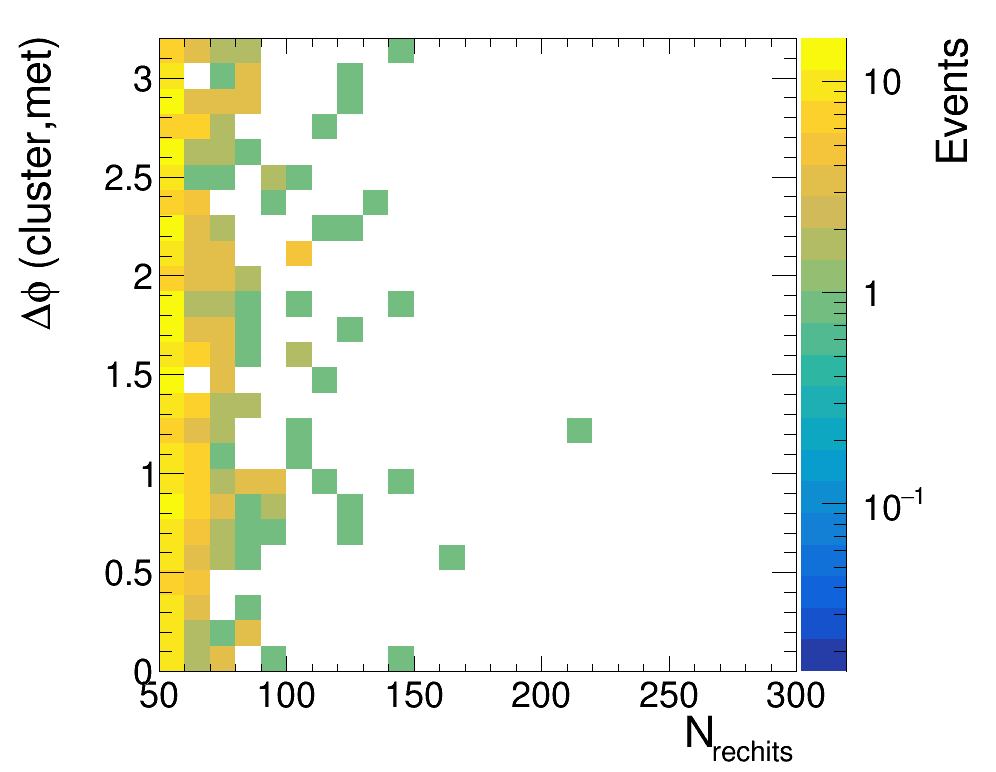

In [27]:
# Plotting ncsc
start_t = time.time()
c = rt.TCanvas('c','c', 1000, 800)

for k in dphiMet_cluster.keys():
    h = create_TH2D(np.column_stack(( nCsc_JetMuonVetoCluster0p4_Me1112Veto[k], np.abs(dphiMet_cluster[k]))),
                   axis_title = ['N_{rechits}','#Delta#phi (cluster,met)','Events'], binning=[25,50,300,25,0,3.2])


    h.Draw('colz')
    c.SetRightMargin(0.2)


    # if setlog: 
    c.SetLogz()
    c.Draw()
    c.SaveAs("/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/validation_region/"+v2+'/'+k+".png")
    c.SaveAs("/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/validation_region/"+v2+'/'+k+".C")
    c.SaveAs("/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/validation_region/"+v2+'/'+k+".pdf")




print(time.time()-start_t)

# ABCD (Scan Nrechits)

In [16]:
a = {}
b = {}
c = {}
d = {}
cuts = np.arange(50,106,1)
cuts = np.arange(60,300,10)
# cuts = np.arange(90,150,1)
n_ev = 5000


# cuts = [90,95,100,104,105]
print(cuts)
bkg_dphiJet = []
sig_dphiJet = []
bkg_dphiCluster = []
sig_dphiCluster = []
print_jetmet = 0
# cuts = np.arange(130,150,5)
for N_RECHIT_CUT in cuts:
    if N_RECHIT_CUT<100:continue
    for k in keys:
        if not k == 'data_oot_BDTbin1': continue
        if print_jetmet:
            var = np.abs(jetMet_dPhiMin30[k])
            DPHI_CUT = 0.6 #0.6
            br = 1
            a[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=N_RECHIT_CUT, var>=DPHI_CUT)])
            b[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]<N_RECHIT_CUT, var>=DPHI_CUT)])
            c[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]<N_RECHIT_CUT, var<DPHI_CUT)])
            d[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=N_RECHIT_CUT, var<DPHI_CUT)])
            pred = b[k]/c[k]*d[k]
            unc_pred = (1./b[k] + 1./c[k] + 1./d[k])**0.5*(b[k]/c[k]*d[k])
            if math.isnan(unc_pred): z_value = float("nan")
            else:
                mu = np.random.normal(pred, unc_pred, n_ev)
                p_value = 0.0
                z_value = 0.0
                for i in mu:
                    if i < 0:continue
                    n = np.random.poisson(i, n_ev)
                    p_value += np.count_nonzero(n>=a[k])

                p_value = p_value/n_ev**2
                z_value = abs(norm.ppf(p_value))
            print(N_RECHIT_CUT, '\t',a[k],'\t',b[k],'\t',c[k],'\t',d[k], '\t',round(pred, 2),
                  '\t', round(unc_pred, 2), '\t', round(z_value,2))
        else:
            br = 1
            var = np.abs(dphiMet_cluster[k])
#             var = np.abs(cscClusterMetXYCorr_dPhi[k])[:,0]
            DPHI_CUT = 0.75
            a[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=N_RECHIT_CUT, var>=DPHI_CUT)])
            b[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]<N_RECHIT_CUT, var>=DPHI_CUT)])
            c[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]<N_RECHIT_CUT, var<DPHI_CUT)])
            d[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=N_RECHIT_CUT, var<DPHI_CUT)])
#             if N_RECHIT_CUT == 210:
#                 print(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=N_RECHIT_CUT, var<DPHI_CUT)])
#                 print(cscRechitClusterJetVetoPt[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=N_RECHIT_CUT, var<DPHI_CUT)])



            pred = c[k]/b[k]*a[k]
            unc_pred = (1./c[k] + 1./b[k] + 1./a[k])**0.5*(c[k]/b[k]*a[k])
            if math.isnan(unc_pred): z_value = float("nan")
            else:
                mu = np.random.normal(pred, unc_pred, n_ev)
                p_value = 0.0
                for i in mu:
                    if i < 0:continue
                    n = np.random.poisson(i, n_ev)
                    p_value += np.count_nonzero(n>=d[k])

                p_value = p_value/n_ev**2
                z_value = abs(norm.ppf(p_value))
            print(N_RECHIT_CUT, '\t',a[k],'\t',b[k],'\t',c[k],'\t',d[k],'\t', round(c[k]/b[k]*a[k], 2), '\t',\
                  round( (1./c[k] + 1./b[k] + 1./a[k])**0.5*(c[k]/b[k]*a[k]), 2), '\t', round(z_value,2))



[ 60  70  80  90 100 110 120 130 140 150 160 170 180 190 200 210 220 230
 240 250 260 270 280 290]
100 	 32.0 	 418.0 	 120.0 	 4.0 	 9.19 	 1.88 	 1.75
110 	 21.0 	 429.0 	 120.0 	 4.0 	 5.87 	 1.42 	 0.83
120 	 14.0 	 436.0 	 120.0 	 4.0 	 3.85 	 1.1 	 0.05
130 	 8.0 	 442.0 	 121.0 	 3.0 	 2.19 	 0.81 	 0.32
140 	 6.0 	 444.0 	 121.0 	 3.0 	 1.64 	 0.69 	 0.7
150 	 2.0 	 448.0 	 122.0 	 2.0 	 0.54 	 0.39 	 1.14
160 	 1.0 	 449.0 	 122.0 	 2.0 	 0.27 	 0.27 	 1.65
170 	 1.0 	 449.0 	 124.0 	 0.0 	 0.28 	 0.28 	 0.99
180 	 1.0 	 449.0 	 124.0 	 0.0 	 0.28 	 0.28 	 1.0
190 	 1.0 	 449.0 	 124.0 	 0.0 	 0.28 	 0.28 	 0.97
200 	 1.0 	 449.0 	 124.0 	 0.0 	 0.28 	 0.28 	 1.01
210 	 1.0 	 449.0 	 124.0 	 0.0 	 0.28 	 0.28 	 1.0
220 	 0.0 	 450.0 	 124.0 	 0.0 	 0.0 	 nan 	 nan
230 	 0.0 	 450.0 	 124.0 	 0.0 	 0.0 	 nan 	 nan
240 	 0.0 	 450.0 	 124.0 	 0.0 	 0.0 	 nan 	 nan
250 	 0.0 	 450.0 	 124.0 	 0.0 	 0.0 	 nan 	 nan
260 	 0.0 	 450.0 	 124.0 	 0.0 	 0.0 	 nan 	 nan
270 	 0.0 	 450.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:76: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in double_scalars


# ABCD (Scan dPhi)

In [19]:

a = {}
b = {}
c = {}
d = {}
cuts = np.arange(50,106,1)
cuts = np.arange(0,35,2)/10
cuts = np.arange(9,22,1)/20
print(cuts)
n_ev = 5000


bkg_dphiJet = []
sig_dphiJet = []
bkg_dphiCluster = []
sig_dphiCluster = []
print_jetmet = 0

N_RECHIT_CUT = 130
for DPHI_CUT in cuts:
    for k in keys:
        if not k == 'data_oot_BDTbin1': continue
        if print_jetmet:
            var = np.abs(jetMet_dPhiMin30[k])
            br = 1
            a[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=N_RECHIT_CUT, var>=DPHI_CUT)])
            b[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]<N_RECHIT_CUT, var>=DPHI_CUT)])
            c[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]<N_RECHIT_CUT, var<DPHI_CUT)])
            d[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=N_RECHIT_CUT, var<DPHI_CUT)])
            pred = b[k]/c[k]*d[k]
            unc_pred = (1./b[k] + 1./c[k] + 1./d[k])**0.5*(b[k]/c[k]*d[k])
            if math.isnan(unc_pred): z_value = float("nan")
            else:
                mu = np.random.normal(pred, unc_pred, n_ev)
                p_value = 0.0
                z_value = 0.0
                for i in mu:
                    if i < 0:continue
                    n = np.random.poisson(i, n_ev)
                    p_value += np.count_nonzero(n>=a[k])

                p_value = p_value/n_ev**2
                z_value = abs(norm.ppf(p_value))
            print(DPHI_CUT, '\t',a[k],'\t',b[k],'\t',c[k],'\t',d[k], '\t',round(pred, 2),
                  '\t', round(unc_pred, 2), '\t', round(z_value,2))

        else:
            var = np.abs(dphiMet_cluster[k])
#             var = np.abs(cscClusterMetXYCorr_dPhi[k])[:,0]


            a[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=N_RECHIT_CUT, var>=DPHI_CUT)])
            b[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]<N_RECHIT_CUT, var>=DPHI_CUT)])
            c[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]<N_RECHIT_CUT, var<DPHI_CUT)])
            d[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=N_RECHIT_CUT, var<DPHI_CUT)])
            pred = c[k]/b[k]*a[k]
            unc_pred = (1./c[k] + 1./b[k] + 1./a[k])**0.5*(c[k]/b[k]*a[k])

            if math.isnan(unc_pred): z_value = float("nan")
            else:
                mu = np.random.normal(pred, unc_pred, n_ev)
                p_value = 0.0
                z_value = 0.0
                for i in mu:
                    if i < 0:continue
                    n = np.random.poisson(i, n_ev)
                    p_value += np.count_nonzero(n>=d[k])

                p_value = p_value/n_ev**2
                z_value = abs(norm.ppf(p_value))
            print(DPHI_CUT, '\t',a[k],'\t',b[k],'\t',c[k],'\t',d[k],'\t', round(pred, 2), \
                  '\t',round( unc_pred, 2), '\t', round(z_value,2))
        

[0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05]
0.45 	 9.0 	 494.0 	 69.0 	 2.0 	 1.26 	 0.45 	 0.37
0.5 	 9.0 	 489.0 	 74.0 	 2.0 	 1.36 	 0.48 	 0.29
0.55 	 9.0 	 480.0 	 83.0 	 2.0 	 1.56 	 0.55 	 0.14
0.6 	 8.0 	 470.0 	 93.0 	 3.0 	 1.58 	 0.59 	 0.76
0.65 	 8.0 	 464.0 	 99.0 	 3.0 	 1.71 	 0.63 	 0.67
0.7 	 8.0 	 449.0 	 114.0 	 3.0 	 2.03 	 0.75 	 0.43
0.75 	 8.0 	 442.0 	 121.0 	 3.0 	 2.19 	 0.81 	 0.32
0.8 	 8.0 	 432.0 	 131.0 	 3.0 	 2.43 	 0.89 	 0.18
0.85 	 8.0 	 421.0 	 142.0 	 3.0 	 2.7 	 0.99 	 0.04
0.9 	 8.0 	 406.0 	 157.0 	 3.0 	 3.09 	 1.13 	 0.15
0.95 	 7.0 	 397.0 	 166.0 	 4.0 	 2.93 	 1.14 	 0.39
1.0 	 7.0 	 381.0 	 182.0 	 4.0 	 3.34 	 1.3 	 0.2
1.05 	 7.0 	 373.0 	 190.0 	 4.0 	 3.57 	 1.38 	 0.09


# OOT projection

In [15]:
N_RECHIT_CUT = 130
DPHI_CUT = 0.75
var = dphiMet_cluster


factor = len(var['data_intime_BDTbin0'])/len(var['data_oot_BDTbin0'])
k = 'data_oot_BDTbin1'
a = factor * np.count_nonzero(np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] >= N_RECHIT_CUT, np.abs(var[k]) >= DPHI_CUT))
b = factor * np.count_nonzero(np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] < N_RECHIT_CUT,  np.abs(var[k]) >= DPHI_CUT)) 
c = factor * np.count_nonzero(np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] < N_RECHIT_CUT,  np.abs(var[k]) < DPHI_CUT)) 
d = factor * np.count_nonzero(np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] >= N_RECHIT_CUT,  np.abs(var[k]) < DPHI_CUT)) 

pred = a*c/b
print(a,b,c,pred)


1.7748478701825556 132.40365111561866 34.43204868154158 0.46155561235310427


## Distribution for event level variables in different binnings

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot


# Plotting ncsc
start_t = time.time()

legend = {}
legend['data_oot'] = 'Data OOT region'
legend['data_intime'] = 'Data in-time region'
legend['mc_signal'] = 'signal MC in time'
legend['mc_intime'] = 'MC in-time background'
legend['mc_oot'] = 'MC OOT background'
legend['mc_bkg'] = 'MC QCD background'


br = 1
k = 'data_oot_BDTbin0'
name = '\Delta \Phi (jet,met)'
name = 'N_{rechits}'
cuts = [50, 90, 120, 180, 2000]
# cuts = [50, 20000]
var = [cscRechitClusterPhi, metPhiXYCorr, jetPhi, jetMet_dPhiMin30, dphiMet_cluster, dphiMetXYCorr_cluster, nDTRechitsStation4]
varName = ['cscRechitClusterPhi', 'metPhi', 'jetPhi', 'jetMet_dPhiMin30', 'dphiMet_cluster','dphiMetXYCorr_cluster', 'nDTRechitsStation4']
xaxis = ['abs(csc cluster \phi)', 'MET \phi', 'leading jet #phi', 'min \Delta \phi(MET,jet)', '\Delta \phi(cluster,met)', '\Delta \phi(cluster,met_{corr})','nDTRechitsStation4']
for j,v in enumerate(var):
    if not j ==3:continue
    leg = rt.TLegend(0.6,0.77,0.90,0.92)

    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    c = rt.TCanvas('c','c', 800, 800)

    h = {}
    rt.gStyle.SetOptFit(1011)
    maxb = 0
    for i,cut in enumerate(cuts):

        metcut = 200
        if i == 0:
            previous_cut = cut

            continue
            cond = nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] <= cut
    #         cond = angle[k]<=cut
        else:
            cond = np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] < cut, nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] >= previous_cut)
    #         cond = np.logical_and(angle[k] <= cut, angle[k] > previous_cut)
        cond = np.logical_and(cond, np.abs(dphiMet_cluster[k])<2.5)

#         cond = np.logical_and(cond, np.logical_and(metPhiXYCorr[k]<-0.0, metPhiXYCorr[k]>-1.6))
    #     h[k] = create_TH1D( nLeptons[k][cond], axis_title=['N_{lep}', 'Events'], name=k, binning=bins)

    #     h[str(i)] = create_TH1D( jetPt[k].count()[cond], axis_title=['N_{jets}', 'Events'], name=k, binning=[15,0,15])
    #     h[str(i)] = create_TH1D( jetPt[k][np.logical_and(cond, jetPt[k].count()>0)][:,0], axis_title=['jet p_{T} [GeV]', 'Events'], name=k, binning=[50,0,2500],weights = weight[k][[np.logical_and(cond, jetPt[k].count()>0)]])
    #     h[str(i)] = create_TH1D( cscRechitClusterEta[k][cond], axis_title=['csc cluster #eta', 'Events'], name=k, binning=[25,-3.2,3.2])
#         print(np.count_nonzero(bdt_sel[k]))
#         print(len(cond))
#         variable = v[k][bdt_sel[k]]
        h[str(i)] = create_TH1D( np.abs(v[k][cond]), axis_title=[xaxis[j], 'Events'], name=k, binning=[10,0,3.2])
#         h[str(i)] = create_TH1D( v[k][cond], axis_title=[xaxis[j], 'Events'], name=k, binning=[10,-3.2,3.2])


    
#         h[str(i)] = create_TH1D( v[k][cond], axis_title=[xaxis[j], 'Events'], name=k, binning=[25,0,320])

#         h[str(i)] = create_TH1D( np.abs(cscRechitClusterPhi[k][bdt_sel[k]][cond]), axis_title=['abs(csc cluster \phi)', 'Events'], name=k, binning=[25,0,3.2])
#         h[str(i)] = create_TH1D( np.abs(metPhi[k][bdt_sel[k]][cond]), axis_title=['abs(MET \phi)', 'Events'], name=k, binning=[25,0,3.2])
#         h[str(i)] = create_TH1D( dphiMet_cluster[k][cond], axis_title=['\Delta \phi(cluster,met)', 'Events'], name=k, binning=[25,0,3.2])
#         h[str(i)] = create_TH1D( np.abs(jetPhi[k][bdt_sel[k]][cond][:,0]), axis_title=['leading jet #phi', 'Events'], name=k, binning=[25,0, 3.2])

#         h[str(i)] = create_TH1D( jetMet_dPhiMin30[k][cond], axis_title=['min \Delta \phi(MET,jet)', 'Events'], name=k, binning=[25,0,3.2])
#         h[str(i)].SetLineColor(std_color_list[i-1])
        print(previous_cut, cut, "," ,len(jetMet_dPhiMin30[k][cond]), np.count_nonzero(jetMet_dPhiMin30[k][cond]>=0.6), np.count_nonzero(jetMet_dPhiMin30[k][cond]<0.6))

        leg.AddEntry(h[str(i)], name+" [%(first)d,%(second)d)"%{"first":previous_cut,"second":cut})

    #     leg.AddEntry(h[str(i)], "N_{rechits} in (%(first)d,%(second)d]"%{"first":previous_cut,"second":cut})
        previous_cut = cut

    #     print(k,"events after 200: ",np.sum(weight[k][nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=0])*br)
#         if i == len(cuts)-1:
        h[str(i)].SetMaximum(7000)
        h[str(i)].SetMinimum(0.1)



    #     r = h[k].Fit('expo', 'LRSQ+', '', 50,400)
    #     print(r.Get())
    #     print(r.Prob())
    #     h[k].GetFunction("expo").SetLineColor(std_color_list[2])
    #     h[k].GetFunction("expo").SetLineWidth(2)
        h[str(i)].GetXaxis().SetLabelSize(0.04)
        h[str(i)].SetLineColor(std_color_list[i])
        h[str(i)].DrawNormalized('same E1')


    c.SetRightMargin(0)
    c.SetLogy()
    leg.Draw()
#     c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/abcdVar/v1p15_'+k+'_'+str(data_year)+'_'+varName[j]+'.png')
    c.Draw()
# print(time.time()-start_t)

# beam halo dphi distribution

15 10
5.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/beamHalo//v5/v86/cscRechitClusterPhi.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/beamHalo//v5/v86/cscRechitClusterPhi.C has been generated


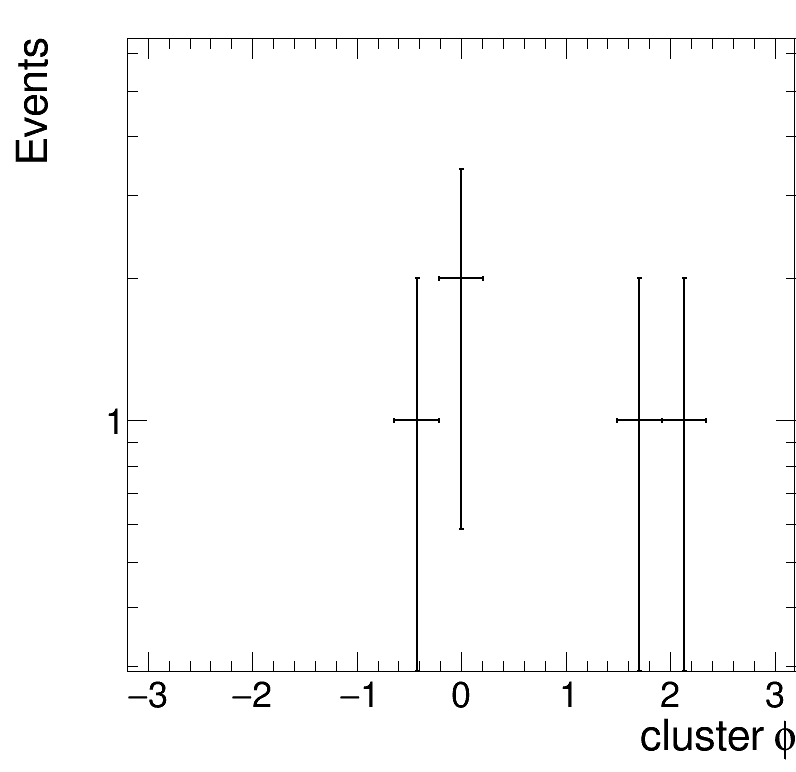

In [13]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

k = 'data_intime_beamhalo'
name = '\Delta \Phi (jet,met)'
name = 'N_{rechits}'

var = [cscRechitClusterPhi, metPhi, dphiMet_cluster]
varName = ['cscRechitClusterPhi', 'metPhi', 'dphiMet_cluster']
xaxis = ['cluster #phi', 'MET #phi', '#Delta #phi(cluster,met)']
bins = [[25,-3.2,3.2], [25,-3.2,3.2], [15,0,3.2]]
bins = [[15,-3.2,3.2], [15,-3.2,3.2], [10,0,3.2]]


for i, v in enumerate(var):
    if not i == 0:continue
    leg = rt.TLegend(0.6,0.77,0.90,0.92)

    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    c = rt.TCanvas('c','c', 800, 800)

    h = {}
    rt.gStyle.SetOptFit(1011)
    if i == 2:
        h = create_TH1D( np.abs(v[k][np.logical_not(beamHaloFilter[k])]), axis_title=[xaxis[i], 'Events'], name='h', binning=bins[i])
    else:
        h = create_TH1D( v[k][np.logical_not(beamHaloFilter[k])], axis_title=[xaxis[i], 'Events'], name='h', binning=bins[i])
    print(len(v[k]), np.count_nonzero(beamHaloFilter[k]))
    print(h.Integral())
    h.Draw('same E1')


    c.SetRightMargin(0)
    c.SetLogy()
#     leg.Draw()
    c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/beamHalo/'+v2+'/'+varName[i]+'.png')
    c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/beamHalo/'+v2+'/'+varName[i]+'.C')

    c.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/beamHalo/clusterPhi_metPhi.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/beamHalo/clusterPhi_metPhi.C has been generated


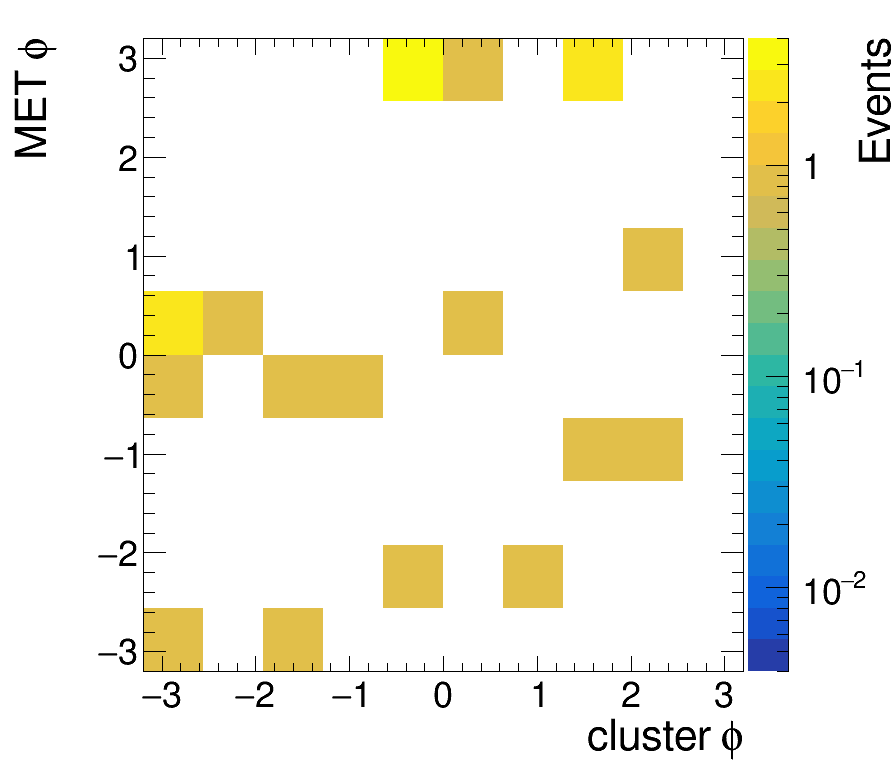

In [17]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

k = 'data_intime_beamhalo'
# k = 'data_intime_punchthrough'


c = rt.TCanvas('c','c', 900, 800)

h = {}
rt.gStyle.SetOptFit(1011)
if 'beamhalo' in k:
    h = create_TH2D( np.column_stack((cscRechitClusterPhi[k][np.logical_not(beamHaloFilter[k])].flatten(),metPhi[k][np.logical_not(beamHaloFilter[k])].flatten())), axis_title=['cluster #phi','MET #phi',\
                                                                                                                'Events'],name = 'x', binning=[10,-3.2,3.2,10,-3.2,3.2])
else:
    jetpt = 10
    h = create_TH2D( np.column_stack((cscRechitClusterPhi[k][cscRechitClusterJetVetoPt[k].flatten()>jetpt],metPhi[k][cscRechitClusterJetVetoPt[k].flatten()>jetpt])), axis_title=['cluster #phi','MET #phi',\
                                                                                                                'Events'],name = 'x', binning=[10,-3.2,3.2,10,-3.2,3.2])

h.Draw('colz')


c.SetRightMargin(0.17)
c.SetLogz()
if 'beamhalo' in k:
    c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/beamHalo/clusterPhi_metPhi.png')
    c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/beamHalo/clusterPhi_metPhi.C')
else:
    c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/clusterPhi_metPhi.png')
    c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/clusterPhi_metPhi.C')



c.Draw()



# jet punch through dphi distribution

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: png file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/dphiMet_cluster_jetpt.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/dphiMet_cluster_jetpt.C has been generated


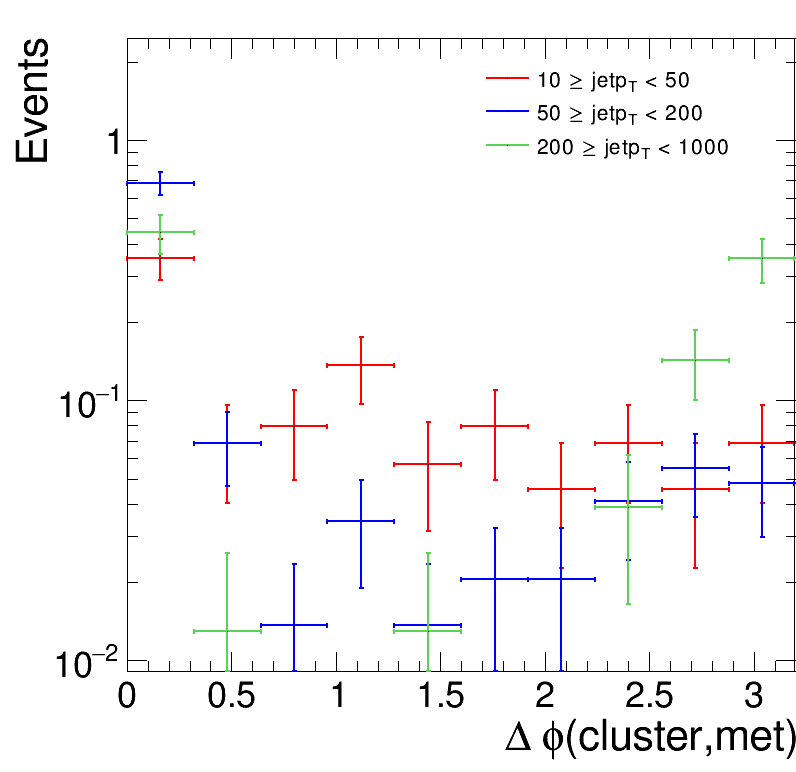

In [26]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

k = 'data_intime_punchthrough'
name = '\Delta \Phi (jet,met)'
name = 'N_{rechits}'

var = [cscRechitClusterPhi, metPhi, dphiMet_cluster, cscRechitClusterJetVetoPt, jetPt]
varName = ['cscRechitClusterPhi', 'metPhi', 'dphiMet_cluster','jetPt', 'leadingjetPt']
xaxis = ['cluster #phi', 'MET #phi', '#Delta #phi(cluster,met)', 'jet p_{T} [GeV]','leading Jet p_{T} [GeV]']
bins = [[20,-3.2,3.2], [20,-3.2,3.2], [10,0,3.2],[20,0,500], [20,0,500]]
jetpt = [10,50,200,1000]
# jetpt = []
for i, v in enumerate(var):
    if not i == 2:continue
    leg = rt.TLegend(0.6,0.79,0.90,0.92)

    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    c = rt.TCanvas('c','c', 800, 800)
    rt.gStyle.SetOptFit(1011)


    h = {}
    if len(jetpt)>0:
        for j,pt in enumerate(jetpt):
            if j == 0:continue
            cond = np.logical_and(cscRechitClusterJetVetoPt[k]<pt, cscRechitClusterJetVetoPt[k]>=jetpt[j-1])
            if i == 2:
                h[j] = create_TH1D( np.abs(v[k][cond.flatten()]), axis_title=[xaxis[i], 'Events'], name='h', binning=bins[i])
            else:
                h[j] = create_TH1D( v[k][cond.flatten()], axis_title=[xaxis[i], 'Events'], name='h', binning=bins[i])
#             print(h[j].Integral(),j)
            leg.AddEntry(h[j], str(jetpt[j-1])+'\geq \mathrm{jet p_{T}} <'+str(pt))
            h[j].SetLineColor(std_color_list[j])
#             h[j].SetMaximum(300)
#             h[j].SetMinimum(0.5)
            h[j].Scale(1/h[j].Integral())
            if j == 1:h[1].GetYaxis().SetRangeUser(0.2*min(map(lambda x: x.GetMinimum(), list(h.values()))), 7.0*max(map(lambda x: x.GetMaximum(), list(h.values()))))
            h[j].Draw('same E1')
        

    else:
        if i == 2:
            h = create_TH1D( np.abs(v[k]), axis_title=[xaxis[i], 'Events'], name='h', binning=bins[i])
        else:
            print(v[k])
            h = create_TH1D( v[k], axis_title=[xaxis[i], 'Events'], name='h', binning=bins[i])
        h.Draw('same E1')

    c.SetRightMargin(0)
    c.SetLogy()
    if len(jetpt)>0:leg.Draw()
    if len(jetpt)>0:
        c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/'+varName[i]+'_jetpt.png')
        c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/'+varName[i]+'_jetpt.C')
    else:
        c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/'+varName[i]+'.png')
        c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/'+varName[i]+'.C')        
    c.Draw()



# compare distribution in-time and OOT

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


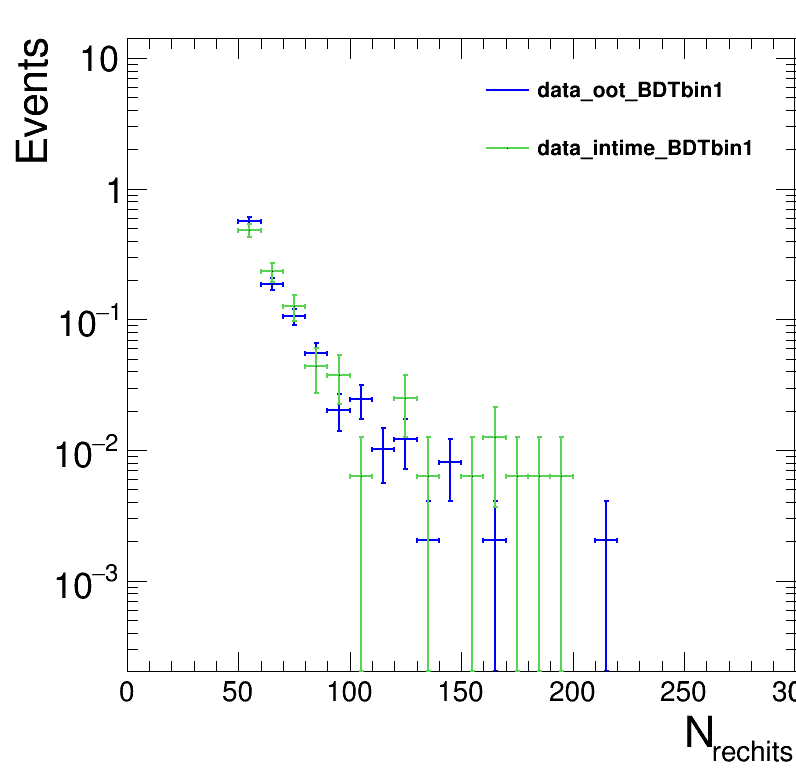

In [28]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot


# Plotting ncsc
start_t = time.time()

legend = {}
legend['data_oot'] = 'Data OOT region'
legend['data_intime'] = 'Data in-time region'
legend['mc_signal'] = 'signal MC in time'
legend['mc_intime'] = 'MC in-time background'
legend['mc_oot'] = 'MC OOT background'
legend['mc_bkg'] = 'MC QCD background'


br = 1
name = '\Delta \Phi (jet,met)'
name = 'N_{rechits}'
cuts = [50, 90, 120, 180, 2000]
# cuts = [50, 20000]
var = [ dphiMet_cluster, nCsc_JetMuonVetoCluster0p4_Me1112Veto]
varName = ['dphiMet_cluster','nCsc_JetMuonVetoCluster0p4_Me1112Veto']
xaxis = [ '\Delta \phi(cluster,met)', 'N_{rechits}']
for j,v in enumerate(var):
    if not j ==1:continue
    leg = rt.TLegend(0.6,0.77,0.90,0.92)

    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    c = rt.TCanvas('c','c', 800, 800)

    h = {}
    rt.gStyle.SetOptFit(1011)
    maxb = 0
    for i,k in enumerate(dphiMet_cluster.keys()):
        if not "1" in k:continue
        h[k] = create_TH1D( np.abs(v[k]), axis_title=[xaxis[j], 'Events'], name='h', binning=[30,0,300])

        h[k].SetMaximum(7000)
        h[k].SetMinimum(0.1)

        leg.AddEntry(h[k],k)
        h[k].GetXaxis().SetLabelSize(0.04)
        h[k].SetLineColor(std_color_list[i])
        h[k].DrawNormalized('same E1')


    c.SetRightMargin(0)
    c.SetLogy()
    leg.Draw()
#     c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/abcdVar/v1p15_'+k+'_'+str(data_year)+'_'+varName[j]+'.png')
    c.Draw()
# print(time.time()-start_t)

# compare time vs. time total

0.22030010513237122
0.22536557392717194


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


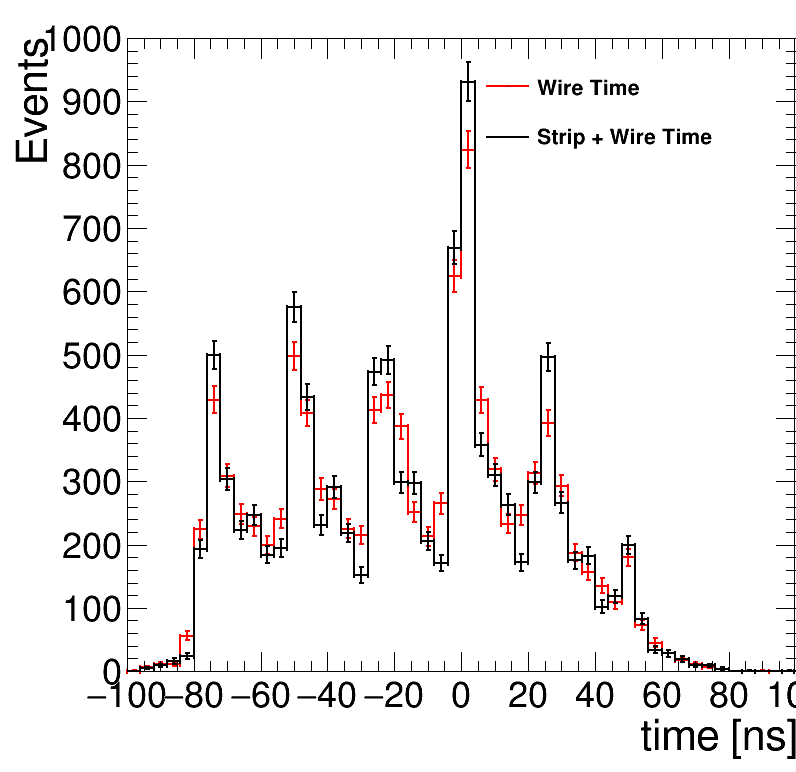

In [31]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

k = 'data_intime_BDTbin0'


leg = rt.TLegend(0.6,0.79,0.90,0.92)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)
rt.gStyle.SetOptFit(1011)


h = {}
    
h['t'] = create_TH1D(cscClusterTime[k], axis_title=['time [ns]', 'Events'], name='h', binning=[50,-100,100])
h['total'] = create_TH1D(cscClusterTimeTotal[k], axis_title=['time [ns]', 'Events'], name='h', binning=[50,-100,100])
h['t'].SetLineColor(std_color_list[1])
h['t'].SetMaximum(1000)
leg.AddEntry(h['t'],'Wire Time')
leg.AddEntry(h['total'],'Strip + Wire Time')

print(np.count_nonzero(np.logical_and(cscClusterTime[k]<12.5,cscClusterTime[k]>-5))/len(cscClusterTime[k]))
print(np.count_nonzero(np.logical_and(cscClusterTimeTotal[k]<12.5,cscClusterTimeTotal[k]>-5))/len(cscClusterTimeTotal[k]))


# leg.AddEntry(h[j], str(jetpt[j-1])+'\geq \mathrm{jet p_{T}} <'+str(pt))
# h[j].SetLineColor(std_color_list[j])
#             h[j].SetMaximum(300)
#             h[j].SetMinimum(0.5)
# if j == 1:h[1].GetYaxis().SetRangeUser(0.2*min(map(lambda x: x.GetMinimum(), list(h.values()))), 7.0*max(map(lambda x: x.GetMaximum(), list(h.values()))))
h['t'].Draw('same hist E1')
h['total'].Draw('same hist E1')



leg.Draw()
c.SetRightMargin(0)
# c.SetLogy()
# if len(jetpt)>0:leg.Draw()
#     if len(jetpt)>0:
#         c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/'+varName[i]+'_jetpt.png')
#         c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/'+varName[i]+'_jetpt.C')
#     else:
#         c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/'+varName[i]+'.png')
#         c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/'+varName[i]+'.C')        
c.Draw()




Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


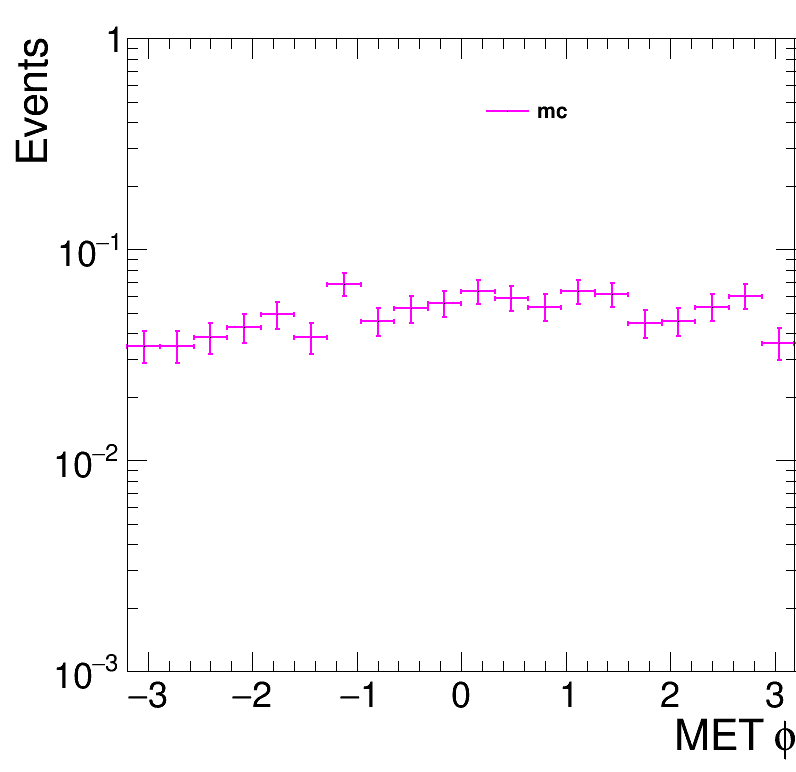

In [48]:
# met distribution

import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot


var = [cscRechitClusterPhi, metPhi, metPhiXYCorr, dphiMet_cluster, cscRechitClusterJetVetoPt, jetPt]
varName = ['cscRechitClusterPhi', 'metPhi', 'metPhiXYCorr', 'dphiMet_cluster','jetPt', 'leadingjetPt']
xaxis = ['cluster #phi', 'MET #phi', 'metPhiXYCorr', '#Delta #phi(cluster,met)', 'jet p_{T} [GeV]','leading Jet p_{T} [GeV]']
bins = [[20,-3.2,3.2], [20,-3.2,3.2], [20,-3.2,3.2], [20,-3,3.2],[20,0,500], [20,0,500]]
# jetpt = []
leg = rt.TLegend(0.6,0.79,0.90,0.92)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)
rt.gStyle.SetOptFit(1011)

for i, v in enumerate(var):
    if not i == 1:continue
    h = {}

    for j, k in enumerate(metPhi.keys()):
        if 'data' in k:continue
#         cond = runNum[k]<=284044 #2016
# #         cond = np.logical_and(runNum[k]>284044, runNum[k]<=306462) #2017
# #         cond = np.logical_and(runNum[k]>306462, runNum[k]<=325273) #2018
#         cond = np.logical_and(runNum[k]>306462, runNum[k]<=319077) #2018



#         cond = runNum[k]<=325273 #all


        h[k] = create_TH1D( v[k], axis_title=[xaxis[i], 'Events'], name='h', binning=bins[i])
        h[k].Scale(1./h[k].Integral())
        h[k].SetMaximum(1)
        h[k].SetMinimum(0.001)
        h[k].SetLineColor(std_color_list[j])
        leg.AddEntry(h[k],k)
        h[k].Draw('same E1')

    c.SetRightMargin(0)
    c.SetLogy()
    leg.Draw()
#     if len(jetpt)>0:
#         c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/'+varName[i]+'_jetpt.png')
#         c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/'+varName[i]+'_jetpt.C')
#     else:
#         c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/'+varName[i]+'.png')
#         c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/'+varName[i]+'.C')        
    c.Draw()


